<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 04: Movielens Dataset Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

### Importing Libraries

In [1]:
from pandas import DataFrame as df
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('precision', 3)

### Loading the Data set

In [3]:
import pandas as pd

unames = ['User_ID', 'Gender', 'Age', 'Occupation', 'Zip']
users = pd.read_table('users.dat', sep='::', header=None,
names=unames,engine = 'python')

rnames = ['User_ID', 'Movie_ID', 'Rating', 'Timestamp']
ratings = pd.read_table('ratings.dat', sep='::', header=None,
names=rnames, engine = 'python')

mnames = ['Movie_ID', 'Title', 'Genres']
movies = pd.read_table('movies.dat', sep='::', header=None,
names=mnames, engine = 'python')

In [4]:
users.head()

,User_ID,Gender,Age,Occupation,Zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
ratings.head()

,User_ID,Movie_ID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
movies.head()

,Movie_ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


### Merging three different Datasets

In [7]:
data = pd.merge(pd.merge(users,ratings),movies)

In [8]:
data

,User_ID,Gender,Age,Occupation,Zip,Movie_ID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,F,18,3,95825,1193,4,978156168,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,M,1,10,48073,1193,5,982730936,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,F,25,7,10023,1193,5,978136709,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,F,25,1,14607,1193,3,978125194,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,M,45,3,55421,1193,5,978557765,One Flew Over the Cuckoo's Nest (1975),Drama


### Most Rated Movies

#### Grouping the database table by title and their total number of ratings

In [9]:
most_rated = data.groupby('Title').size().sort_values(ascending = False)
mr = df(most_rated, columns=['Total Rating'])
mr[:10]

,Total Rating
Title,
American Beauty (1999),3428
Star Wars: Episode IV - A New Hope (1977),2991
Star Wars: Episode V - The Empire Strikes Back (1980),2990
Star Wars: Episode VI - Return of the Jedi (1983),2883
Jurassic Park (1993),2672
Saving Private Ryan (1998),2653
Terminator 2: Judgment Day (1991),2649
"Matrix, The (1999)",2590
Back to the Future (1985),2583


### Least Rated Movies

In [10]:
least_rated = mr[::-1]
least_rated[:10]

,Total Rating
Title,
Another Man's Poison (1952),1
Night Tide (1961),1
Shadows (Cienie) (1988),1
"McCullochs, The (1975)",1
Anna (1996),1
Target (1995),1
Even Dwarfs Started Small (Auch Zwerge haben klein angefangen) (1971),1
Tashunga (1995),1
Waltzes from Vienna (1933),1


### Average Rating by User

#### Average rating and  total counting of every movie

In [74]:
meanratings_by_user = data.groupby('Title').aggregate({'Rating': {'Count': np.size,'Mean': np.mean}})
meanratings_by_user.head()

E:\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Rating       
                               Count   Mean
Title                                      
$1,000,000 Duck (1971)            37  3.027
'Night Mother (1986)              70  3.371
'Til There Was You (1997)         52  2.692
'burbs, The (1989)               303  2.911
...And Justice for All (1979)    199  3.714

### Top most Rated Movies and their Average Rating

In [13]:
df(meanratings_by_user['Rating'].sort_values(by = 'Count', ascending =False)).head()

,Count,Mean
Title,,
American Beauty (1999),3428,4.317
Star Wars: Episode IV - A New Hope (1977),2991,4.454
Star Wars: Episode V - The Empire Strikes Back (1980),2990,4.293
Star Wars: Episode VI - Return of the Jedi (1983),2883,4.023
Jurassic Park (1993),2672,3.764


### Movies with mean Rating greater than 4

In [14]:
df(meanratings_by_user[meanratings_by_user['Rating', 'Mean'] >= 4][:10])

Rating       
                                                Count   Mean
Title                                                       
12 Angry Men (1957)                               616  4.295
2001: A Space Odyssey (1968)                     1716  4.069
24 7: Twenty Four Seven (1997)                      5  4.000
39 Steps, The (1935)                              253  4.075
400 Blows, The (Les Quatre cents coups) (1959)    187  4.321
42 Up (1998)                                       88  4.227
8 1/2 (1963)                                      228  4.105
African Queen, The (1951)                        1057  4.252
After Life (1998)                                 102  4.088
Alien (1979)                                     2024  4.160

### Average Rating Of movies by Gender

#### ->Pivoting the gender column to show average rating given on every movie
#### based on gender

In [15]:
meanratings_by_gender = data.pivot_table('Rating', index = ['Movie_ID','Title'], columns = 'Gender', aggfunc = 'mean')

In [16]:
meanratings_by_gender[:10]

,Gender,F,M
Movie_ID,Title,,
1,Toy Story (1995),4.188,4.131
2,Jumanji (1995),3.278,3.175
3,Grumpier Old Men (1995),3.074,2.994
4,Waiting to Exhale (1995),2.976,2.482
5,Father of the Bride Part II (1995),3.213,2.888
6,Heat (1995),3.682,3.910
7,Sabrina (1995),3.588,3.268
8,Tom and Huck (1995),3.357,2.775
9,Sudden Death (1995),2.100,2.717


#### ->Difference of opinion between male and female on every movie
#### using  their average ratings

In [17]:
meanratings_by_gender['Difference'] = meanratings_by_gender.M - meanratings_by_gender.F
meanratings_by_gender.head()

,Gender,F,M,Difference
Movie_ID,Title,,,
1,Toy Story (1995),4.188,4.131,-0.057
2,Jumanji (1995),3.278,3.175,-0.103
3,Grumpier Old Men (1995),3.074,2.994,-0.079
4,Waiting to Exhale (1995),2.976,2.482,-0.494
5,Father of the Bride Part II (1995),3.213,2.888,-0.325


In [18]:
meanratings_by_gender.reset_index('Movie_ID', inplace=True)

In [19]:
top_50 = data.groupby('Movie_ID').size().sort_values(ascending=False)[:50]

#### Plotting of Bar graph of differnce in ratings by gender

Text(0.5,0,'Average Rating Difference')

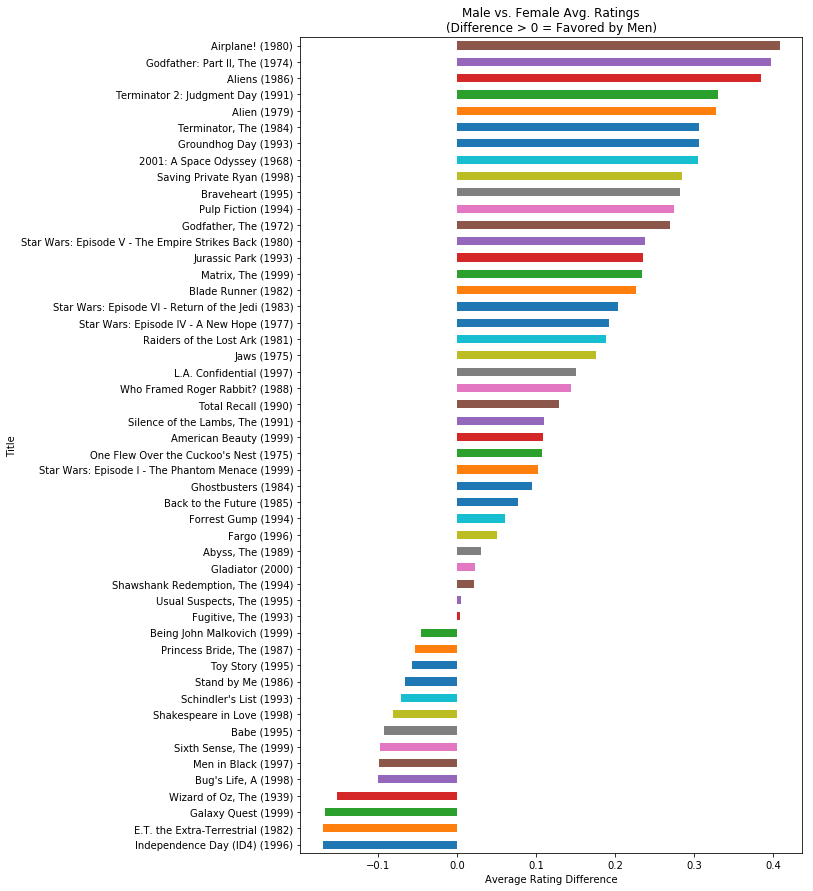

In [20]:
variation = meanratings_by_gender[meanratings_by_gender.Movie_ID.isin(top_50.index)]['Difference']
variation.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference')

## Average Rating by Age Group

##     Given Age Range
###     1:  "Under 18"   18:  "18-24"
### 	25:  "25-34"       35:  "35-44"
### 	45:  "45-49"       50:  "50-55"
### 	56:  "56+"

In [21]:
temp = data.pivot_table('Rating', index = ['User_ID', 'Title'], columns='Age', aggfunc='mean')
temp.fillna(0)[:10]

Age                                   1    18   25   35   45   50   56
User_ID Title                                                         
1       Airplane! (1980)             4.0  0.0  0.0  0.0  0.0  0.0  0.0
        Aladdin (1992)               4.0  0.0  0.0  0.0  0.0  0.0  0.0
        Antz (1998)                  4.0  0.0  0.0  0.0  0.0  0.0  0.0
        Apollo 13 (1995)             5.0  0.0  0.0  0.0  0.0  0.0  0.0
        Awakenings (1990)            5.0  0.0  0.0  0.0  0.0  0.0  0.0
        Back to the Future (1985)    5.0  0.0  0.0  0.0  0.0  0.0  0.0
        Bambi (1942)                 4.0  0.0  0.0  0.0  0.0  0.0  0.0
        Beauty and the Beast (1991)  5.0  0.0  0.0  0.0  0.0  0.0  0.0
        Ben-Hur (1959)               5.0  0.0  0.0  0.0  0.0  0.0  0.0
        Big (1988)                   4.0  0.0  0.0  0.0  0.0  0.0  0.0

In [22]:
temp.query('User_ID == [69, 135]').fillna(0)

Age                                                          1    18   25  \
User_ID Title                                                               
69      Affliction (1997)                                   0.0  0.0  4.0   
        All About My Mother (Todo Sobre Mi Madre) (1999)    0.0  0.0  5.0   
        American Beauty (1999)                              0.0  0.0  5.0   
        American History X (1998)                           0.0  0.0  4.0   
        Angels and Insects (1995)                           0.0  0.0  2.0   
        As Good As It Gets (1997)                           0.0  0.0  4.0   
        Boat, The (Das Boot) (1981)                         0.0  0.0  4.0   
        Boogie Nights (1997)                                0.0  0.0  5.0   
        Bound (1996)                                        0.0  0.0  5.0   
        Bronx Tale, A (1993)                                0.0  0.0  4.0   
        Butcher Boy, The (1998)                             0.0  0.0  2.0   
        Carlito's Way (1993)                                0.0  0.0  5.0   
        Cider House Rules, The (1999)                       0.0  0.0  4.0   
        Contact (1997)                                      0.0  0.0  2.0   
        Crimson Tide (1995)                                 0.0  0.0  4.0   
        Cry, the Beloved Country (1995)                     0.0  0.0  5.0   
        Dances with Wolves (1990)                           0.0  0.0  2.0   
        Donnie Brasco (1997)                                0.0  0.0  4.0   
        Down in the Delta (1998)                            0.0  0.0  2.0   
        Eat Drink Man Woman (1994)                          0.0  0.0  5.0   
        Elizabeth (1998)                                    0.0  0.0  5.0   
        English Patient, The (1996)                         0.0  0.0  5.0   
        Farewell My Concubine (1993)                        0.0  0.0  4.0   
        Flower of My Secret, The (La Flor de Mi Secreto...  0.0  0.0  5.0   
        Forrest Gump (1994)                                 0.0  0.0  4.0   
        Gattaca (1997)                                      0.0  0.0  5.0   
        Glengarry Glen Ross (1992)                          0.0  0.0  5.0   
        Good Will Hunting (1997)                            0.0  0.0  5.0   
        Henry Fool (1997)                                   0.0  0.0  3.0   
        Ice Storm, The (1997)                               0.0  0.0  4.0   
...                                                         ...  ...  ...   
135     Mystery Men (1999)                                  0.0  4.0  0.0   
        Office Space (1999)                                 0.0  5.0  0.0   
        Powder (1995)                                       0.0  3.0  0.0   
        Prince of Egypt, The (1998)                         0.0  4.0  0.0   
        Princess Bride, The (1987)                          0.0  5.0  0.0   
        Pushing Tin (1999)                                  0.0  4.0  0.0   
        Red Violin, The (Le Violon rouge) (1998)            0.0  5.0  0.0   
        Romy and Michele's High School Reunion (1997)       0.0  1.0  0.0   
        Run Lola Run (Lola rennt) (1998)                    0.0  5.0  0.0   
        Runaway Bride (1999)                                0.0  2.0  0.0   
        Rushmore (1998)                                     0.0  5.0  0.0   
        Scream 3 (2000)                                     0.0  1.0  0.0   
        Shaggy Dog, The (1959)                              0.0  3.0  0.0   
        Shakespeare in Love (1998)                          0.0  5.0  0.0   
        Sixth Sense, The (1999)                             0.0  5.0  0.0   
        Sleepy Hollow (1999)                                0.0  3.0  0.0   
        South Park: Bigger, Longer and Uncut (1999)         0.0  5.0  0.0   
        Star Wars: Episode VI - Return of the Jedi (1983)   0.0  5.0  0.0   
        Stigmata (1999)                                     0.0  2.0  0.0

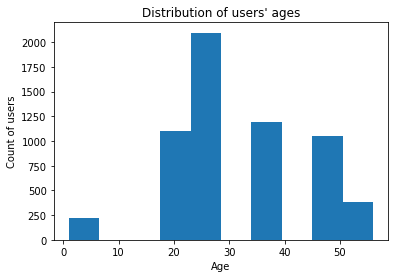

In [23]:
users.Age.plot.hist()
plt.title("Distribution of users' ages")
plt.ylabel('Count of users')
plt.xlabel('Age');

# User Defined Age Range

In [24]:
Age_Group = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69']
data['Age_Group'] = pd.cut(data.Age, range(0, 71, 10), labels=Age_Group)
data[['Age','Age_Group']].head()

,Age,Age_Group
0,1,0-9
1,56,50-59
2,25,20-29
3,25,20-29
4,50,40-49


#### Calculating the mean ratings based on different age groups

In [25]:
mean_ratings_by_age = data.pivot_table('Rating', index = 'Title', columns='Age_Group', aggfunc='mean')

In [26]:
mean_ratings_by_age.fillna(0)[:15]

Age_Group,0-9,10-19,20-29,30-39,40-49,50-59
Title,,,,,,
"$1,000,000 Duck (1971)",0.000,3.000,3.091,3.133,2.600,0.000
'Night Mother (1986),2.000,4.667,3.423,2.905,3.667,4.333
'Til There Was You (1997),3.500,2.500,2.667,2.900,2.400,2.667
"'burbs, The (1989)",4.500,3.244,2.652,2.818,3.000,2.667
...And Justice for All (1979),3.000,3.429,3.724,3.657,3.776,3.929
1-900 (1994),0.000,0.000,2.000,0.000,0.000,3.000
10 Things I Hate About You (1999),3.745,3.415,3.433,3.103,3.431,4.000
101 Dalmatians (1961),3.514,3.295,3.614,3.826,3.819,3.190
101 Dalmatians (1996),3.088,2.468,2.929,3.280,3.444,3.556


In [27]:
mean_ratings_by_age['20-29'].count()

3508

#### Plotting the Histogram for Age group's average ratings

Text(0.5,1,'Average Rating Given by Age(50-59)')

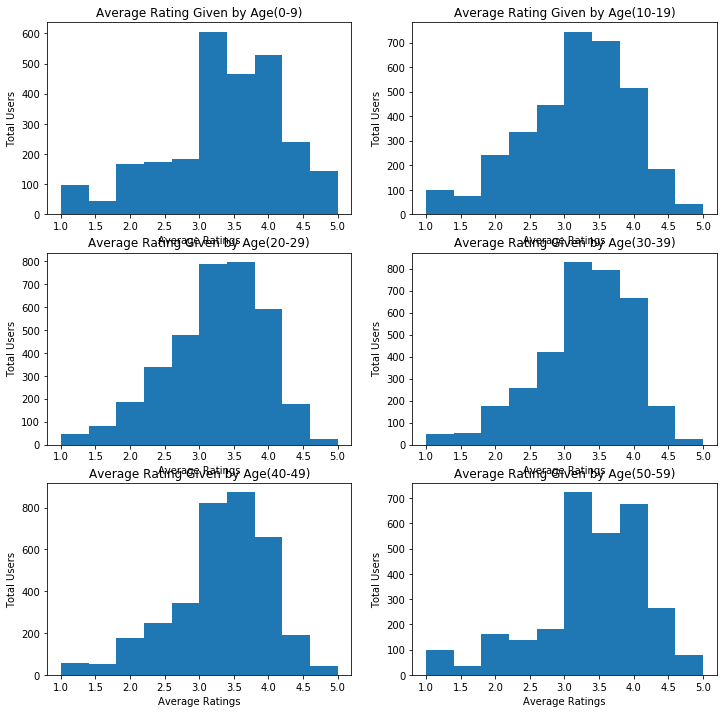

In [28]:
plt.subplot(3, 2, 1)
mean_ratings_by_age['0-9'].plot(kind = 'hist', figsize = [12, 12])
plt.xlabel('Average Ratings')
plt.ylabel('Total Users')
plt.title('Average Rating Given by Age(0-9)')

plt.subplot(3, 2, 2)
mean_ratings_by_age['10-19'].plot(kind = 'hist', figsize = [12, 12])
plt.xlabel('Average Ratings')
plt.ylabel('Total Users')
plt.title('Average Rating Given by Age(10-19)')

plt.subplot(3, 2, 3)
mean_ratings_by_age['20-29'].plot(kind = 'hist', figsize = [12, 12])
plt.xlabel('Average Ratings')
plt.ylabel('Total Users')
plt.title('Average Rating Given by Age(20-29)')

plt.subplot(3, 2, 4)
mean_ratings_by_age['30-39'].plot(kind = 'hist', figsize = [12, 12])
plt.xlabel('Average Ratings')
plt.ylabel('Total Users')
plt.title('Average Rating Given by Age(30-39)')

plt.subplot(3, 2, 5)
mean_ratings_by_age['40-49'].plot(kind = 'hist', figsize = [12, 12])
plt.xlabel('Average Ratings')
plt.ylabel('Total Users')
plt.title('Average Rating Given by Age(40-49)')

plt.subplot(3, 2, 6)
mean_ratings_by_age['50-59'].plot(kind = 'hist', figsize = [12, 12])
plt.xlabel('Average Ratings')
plt.ylabel('Total Users')
plt.title('Average Rating Given by Age(50-59)')

### Statistics Measures Of Ratings

In [29]:
mean_ratings_by_age.describe().fillna(0)

Age_Group,0-9,10-19,20-29,30-39,40-49,50-59
count,2650.000,3393.000,3508.000,3447.000,3458.000,2913.00
mean,3.350,3.165,3.231,3.287,3.309,3.37
std,0.890,0.792,0.717,0.698,0.713,0.82
min,1.000,1.000,1.000,1.000,1.000,1.00
25%,2.937,2.682,2.793,2.904,2.966,3.00
50%,3.486,3.250,3.314,3.375,3.428,3.50
75%,4.000,3.744,3.758,3.803,3.818,4.00
max,5.000,5.000,5.000,5.000,5.000,5.00


### Average Rating by Occupation

In [30]:
Name = ['Other', 'academic/educator', 'artist','clerical/admin','college/grad student','customer service',
              'doctor/health care','executive/managerial','farmer','homemaker','K-12 student','lawyer',
              'programmer','retired','sales/marketing','scientist','self-employed','technician/engineer','tradesman/craftsman',
              'unemployed','writer']
data['Name'] = pd.cut(data.Occupation, range(22), labels=Name)
data[['Occupation','Name']].head()

,Occupation,Name
0,10,homemaker
1,16,scientist
2,12,lawyer
3,7,doctor/health care
4,1,Other


#### Table for average rating based on different defined ocuupation

In [31]:
mean_ratings_by_occupation = data.pivot_table('Rating', index = 'Title', columns='Name', aggfunc='mean')

In [32]:
mean_ratings_by_occupation.fillna(0).head()

Name,Other,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,homemaker,K-12 student,lawyer,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed
Title,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",2.167,0.000,4.000,2.800,4.000,3.000,3.000,0.0,3.667,0.0,0.000,1.000,2.000,0.000,0.0,5.000,3.500,0.00,3.5,2.333
'Night Mother (1986),3.714,3.000,3.400,3.667,3.750,3.500,3.545,0.0,0.000,1.0,5.000,0.000,4.667,3.500,3.5,3.000,2.500,4.50,0.0,3.000
'Til There Was You (1997),2.667,2.500,2.200,3.333,0.000,2.000,2.857,0.0,0.000,3.5,4.000,3.000,4.000,2.600,0.0,1.500,4.000,1.00,2.0,2.333
"'burbs, The (1989)",2.958,2.950,2.833,3.022,2.917,2.625,2.615,5.0,2.800,5.0,2.000,2.933,0.000,3.250,3.2,2.833,3.000,3.10,3.4,3.000
...And Justice for All (1979),3.650,3.833,2.875,3.444,3.750,3.889,3.848,0.0,3.500,3.0,3.833,3.500,4.000,3.538,4.0,4.000,4.091,3.75,4.0,3.714


In [34]:
df(mean_ratings_by_occupation.describe().iloc[:2])

Name,Other,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,homemaker,K-12 student,lawyer,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed
count,3218.000,3145.000,2952.000,3363.00,2632.000,3011.000,3269.000,1445.000,2192.000,2455.000,2579.000,2925.000,2340.000,2953.000,2517.000,3123.000,3087.000,2449.000,2679.000,3330.000
mean,3.215,3.256,3.402,3.19,3.357,3.326,3.264,3.355,3.487,3.364,3.233,3.392,3.461,3.345,3.382,3.352,3.322,3.362,3.143,3.147


### Most Waching Occupation

#### Calculation of most watching occupation based on total rating count

In [35]:
most_watching_occupation = data.groupby('Name').size().sort_values(ascending = False)
mwo = df(most_watching_occupation, columns = ['Total Ratings'])
mwo

,Total Ratings
Name,
clerical/admin,131032
doctor/health care,105425
Other,85351
self-employed,72816
unemployed,60397
lawyer,57214
academic/educator,50068
retired,49109
scientist,46021


#### Plotting the Bar Graph for Occupation versus total ratings

Text(0.5,1,'Most Watching Occupation')

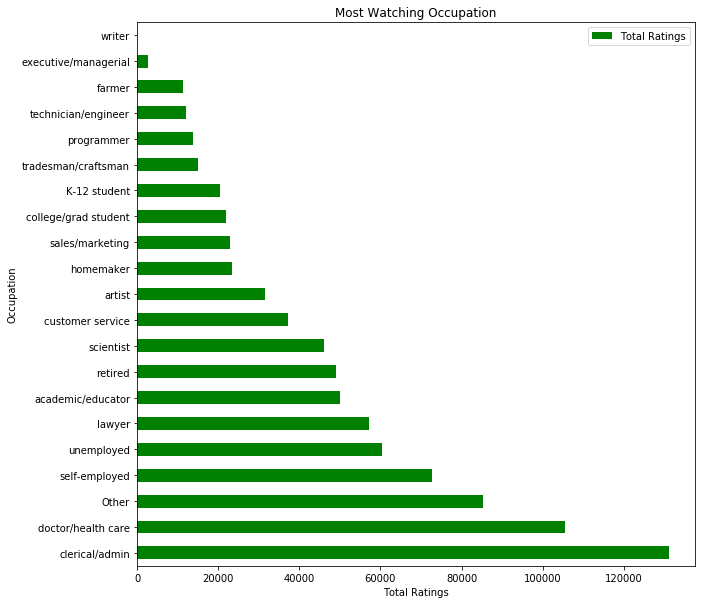

In [36]:
mwo.plot(kind = 'barh', color = 'green', figsize=[10,10])
plt.xlabel('Total Ratings')
plt.ylabel('Occupation')
plt.title('Most Watching Occupation')

In [37]:
df(mean_ratings_by_occupation['Other'][:10]).fillna(0)

,Other
Title,
"$1,000,000 Duck (1971)",2.167
'Night Mother (1986),3.714
'Til There Was You (1997),2.667
"'burbs, The (1989)",2.958
...And Justice for All (1979),3.650
1-900 (1994),0.000
10 Things I Hate About You (1999),3.463
101 Dalmatians (1961),3.627
101 Dalmatians (1996),3.118


## Generes

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

### Average Rating of Genre

In [67]:
total_diff_genre_movies = data.groupby('Genres').aggregate({'Rating': {'Count': np.size,'Mean': np.mean}})
total_diff_genre_movies

E:\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Rating       
                                               Count   Mean
Genres                                                     
Action                                         12311  3.355
Action|Adventure                               10446  3.677
Action|Adventure|Animation                       345  4.148
Action|Adventure|Animation|Children's|Fantasy    135  2.704
Action|Adventure|Animation|Horror|Sci-Fi         618  3.547
Action|Adventure|Children's                       44  1.318
Action|Adventure|Children's|Comedy               518  2.307
Action|Adventure|Children's|Fantasy               44  2.091
Action|Adventure|Children's|Sci-Fi               350  1.874
Action|Adventure|Comedy                         2077  3.095
Action|Adventure|Comedy|Crime                   2573  3.137
Action|Adventure|Comedy|Horror                   548  3.827
Action|Adventure|Comedy|Horror|Sci-Fi            945  3.804
Action|Adventure|Comedy|Romance                 5736  3.862
Action|Adventure|Comedy|Sci-Fi                  2538  3.740
Action|Adventure|Comedy|War                      213  2.277
Action|Adventure|Crime                          1862  2.925
Action|Adventure|Crime|Drama                    1431  3.601
Action|Adventure|Crime|Thriller                  216  2.782
Action|Adventure|Drama                          1643  3.270
Action|Adventure|Drama|Romance                   362  2.950
Action|Adventure|Drama|Sci-Fi|War               2990  4.293
Action|Adventure|Drama|Thriller                  201  3.423
Action|Adventure|Fantasy                        1989  3.220
Action|Adventure|Fantasy|Sci-Fi                 6211  3.904
Action|Adventure|Horror                         1932  3.378
Action|Adventure|Horror|Thriller                1007  3.322
Action|Adventure|Mystery                        1906  3.424
Action|Adventure|Mystery|Sci-Fi                  565  2.239
Action|Adventure|Romance                        1129  3.419
...                                              ...    ...
Film-Noir|Sci-Fi                                1800  4.273
Film-Noir|Sci-Fi|Thriller                        874  3.823
Film-Noir|Thriller                              1983  4.207
Horror                                         22563  3.072
Horror|Mystery                                   102  2.745
Horror|Mystery|Thriller                         2014  2.912
Horror|Romance                                  1900  3.457
Horror|Sci-Fi                                   7438  3.057
Horror|Sci-Fi|Thriller                          1504  2.727
Horror|Thriller                                 8649  3.200
Musical                                         3211  3.797
Musical|Romance                                 3178  3.947
Musical|Romance|War                              280  3.614
Musical|War                                      443  3.903
Mystery                                         1168  3.786
Mystery|Romance|Thriller                         955  3.609
Mystery|Sci-Fi                                   522  3.439
Mystery|Sci-Fi|Thriller                          996  3.493
Mystery|Thriller                                6596  3.891
Romance                                         2077  3.391
Romance|Thriller                                 562  3.875
Romance|War                                      130  3.385
Romance|Western                                   63  3.651
Sci-Fi                                          5115  3.594
Sci-Fi|Thriller                                 4702  3.028
Sci-Fi|Thriller|War                              280  3.439
Sci-Fi|War                                      1367  4.450
Thriller                                       17851  3.556
War                                              991  3.889
Western                                         5689  3.853

[301 rows x 2 columns]

In [57]:
total_diff_genre_movies.loc['Comedy']

Rating  Count    116883.000
        Mean          3.464
Name: Comedy, dtype: float64

### Most Watched(Rated) Genre

In [58]:
mwg = df(total_diff_genre_movies['Rating']['Count'].sort_values(ascending = False))
mwg[:10]

,Count
Genres,
Comedy,116883
Drama,111423
Comedy|Romance,42712
Comedy|Drama,42245
Drama|Romance,29170
Action|Thriller,26759
Horror,22563
Drama|Thriller,18248
Thriller,17851


#### Plotting of most watched Genre

Text(0.5,0,'Total Ratings')

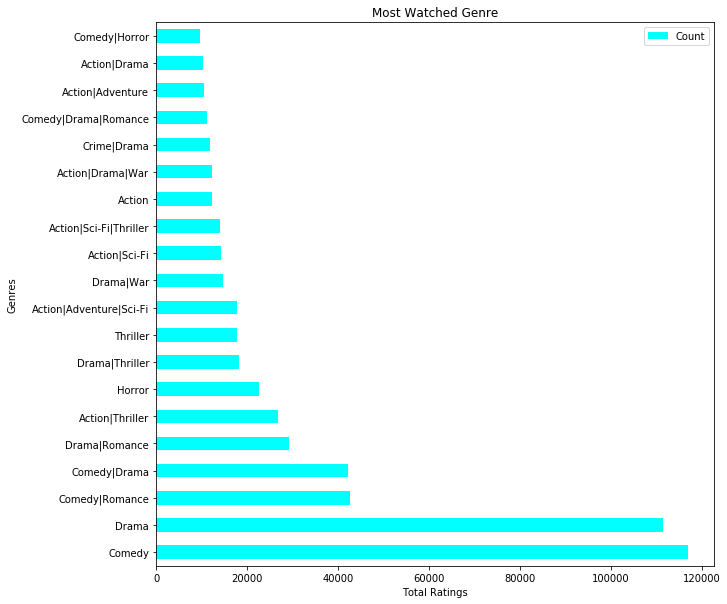

In [59]:
mwg[:20].plot(kind = 'barh', color = 'cyan', figsize=[10, 10])
plt.title('Most Watched Genre')
plt.xlabel('Total Ratings')

#### Least rated movies by Genre

In [61]:
df(total_diff_genre_movies['Rating']['Count'].sort_values()).iloc[:5]

,Count
Genres,
Fantasy,1
Film-Noir|Horror,2
Comedy|Film-Noir|Thriller,5
Children's|Fantasy,27
Drama|Romance|Western,29


### Preferred Genre by Occupation

#### Calculating Total Ratings of each Genre based on different Occupation

In [62]:
genre_by_occupation = data.pivot_table(index = ['Name', 'Occupation'],columns = 'Genres', aggfunc='size')

In [63]:
genre_by_occupation.fillna(0)

,Genres,Action,Action|Adventure,Action|Adventure|Animation,Action|Adventure|Animation|Children's|Fantasy,Action|Adventure|Animation|Horror|Sci-Fi,Action|Adventure|Children's,Action|Adventure|Children's|Comedy,Action|Adventure|Children's|Fantasy,Action|Adventure|Children's|Sci-Fi,Action|Adventure|Comedy,...,Romance|Thriller,Romance|War,Romance|Western,Sci-Fi,Sci-Fi|Thriller,Sci-Fi|Thriller|War,Sci-Fi|War,Thriller,War,Western
Name,Occupation,,,,,,,,,,,,,,,,,,,,,
Other,1,863.0,783.0,24.0,6.0,32.0,3.0,40.0,3.0,20.0,128.0,...,70.0,9.0,3.0,427.0,328.0,26.0,146.0,1444.0,98.0,442.0
academic/educator,2,531.0,440.0,19.0,8.0,30.0,2.0,29.0,3.0,19.0,100.0,...,31.0,8.0,1.0,264.0,202.0,11.0,67.0,839.0,28.0,273.0
artist,3,318.0,293.0,10.0,1.0,16.0,0.0,20.0,1.0,6.0,68.0,...,38.0,3.0,3.0,141.0,122.0,13.0,32.0,634.0,23.0,183.0
clerical/admin,4,1503.0,1364.0,83.0,21.0,64.0,6.0,70.0,9.0,74.0,333.0,...,63.0,17.0,0.0,517.0,682.0,13.0,154.0,2157.0,81.0,477.0
college/grad student,5,366.0,253.0,8.0,4.0,21.0,2.0,10.0,2.0,10.0,59.0,...,5.0,1.0,0.0,118.0,104.0,8.0,21.0,396.0,13.0,171.0
customer service,6,383.0,375.0,6.0,6.0,14.0,2.0,18.0,1.0,8.0,56.0,...,17.0,7.0,4.0,172.0,146.0,10.0,42.0,720.0,39.0,192.0
doctor/health care,7,1548.0,1240.0,17.0,6.0,58.0,4.0,49.0,2.0,21.0,177.0,...,45.0,10.0,10.0,528.0,451.0,26.0,140.0,2066.0,143.0,820.0
executive/managerial,8,57.0,49.0,1.0,1.0,3.0,0.0,2.0,1.0,1.0,8.0,...,0.0,0.0,0.0,16.0,23.0,1.0,4.0,24.0,2.0,9.0
farmer,9,71.0,88.0,0.0,3.0,3.0,0.0,8.0,0.0,2.0,28.0,...,10.0,1.0,0.0,22.0,23.0,0.0,9.0,181.0,4.0,38.0


In [64]:
genre_by_occupation.loc['programmer'].fillna(0)

Genres,Action,Action|Adventure,Action|Adventure|Animation,Action|Adventure|Animation|Children's|Fantasy,Action|Adventure|Animation|Horror|Sci-Fi,Action|Adventure|Children's,Action|Adventure|Children's|Comedy,Action|Adventure|Children's|Fantasy,Action|Adventure|Children's|Sci-Fi,Action|Adventure|Comedy,...,Romance|Thriller,Romance|War,Romance|Western,Sci-Fi,Sci-Fi|Thriller,Sci-Fi|Thriller|War,Sci-Fi|War,Thriller,War,Western
Occupation,,,,,,,,,,,,,,,,,,,,,
13,120.0,144.0,0.0,0.0,2.0,0.0,3.0,0.0,1.0,17.0,...,11.0,5.0,6.0,90.0,51.0,4.0,28.0,232.0,34.0,135.0


In [65]:
df(genre_by_occupation.Mystery)

,,Mystery
Name,Occupation,
Other,1,126.0
academic/educator,2,63.0
artist,3,50.0
clerical/admin,4,106.0
college/grad student,5,16.0
customer service,6,44.0
doctor/health care,7,111.0
executive/managerial,8,1.0
farmer,9,8.0
